## Abstract

#### Motivation and audience:

The "Superstore" dataset was chosen because of my interest in retail. It is something that we can see in our day to day, and it is found everywhere, physically and online. With the tools that we have used here, the business will be able to benefit, it will be able to have a better vision through its numbers, plan and make a better forecast regarding its growth.

#### Problem we seek to solve:

For this dataset, having enough information on sales (4 years), we want to predict the margin (Profit) and know which of our independent variables are the most relevant when it comes to predicting our margin.

#### Research objectives:

* What is the region that is generating the most profit?
* What is the category that has the highest profit and sales?
* What are our best-selling products?
* What are the seasons with the highest demand?
* Which shipment is the one that our customers are using the most?

#### Data acquisition:

This is a dataset chosen from the Kaggle site. In order to access them, the [Link](https://www.kaggle.com/datasets/jr2ngb/superstore-data) is left.

Below is a detail of each variable (columns):

* **Row ID** 
* **Order ID** 
* **Order Date**
* **Ship Date** 
* **Ship Mode** 
* **Customer ID** 
* **Customer Name** 
* **Segment** 
* **Country** 
* **City** 
* **State**
* **Postal Code** 
* **Region** 
* **Product ID** 
* **Category** 
* **Sub-Category** 
* **Product Name** 
* **Sales** 
* **Quantity** 
* **Discount** 
* **Profit**

## Library import

In [1]:
#Handling data
import pandas as pd
import missingno as msno
import numpy as np

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim #Works for extract states codes
import folium  #To plot a map
from folium.plugins import HeatMap #For correlation

#Process and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

#Metrics
from sklearn.metrics import r2_score 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#Library Gridsearch y RFR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

#Setting for warnings
import warnings
warnings.filterwarnings('ignore')

### Data

In [2]:
ss = pd.read_csv('./superstore.csv')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
ss.info() #Info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
#Data shape
print(ss.shape)
train= ss.drop_duplicates()
print(ss.shape)

(9994, 21)
(9994, 21)


As we can see in the previous code, there are no missing or duplicate values.

We proceed to review the data and answer the most relevant business questions.

While we answer the business questions, in parallel we will be reviewing in more detail in each one if we can obtain more information from them.

Representing the profit in bars and ordering it from highest to lowest, the first one is answered:

* **Which is the region that is generating the most profit?**

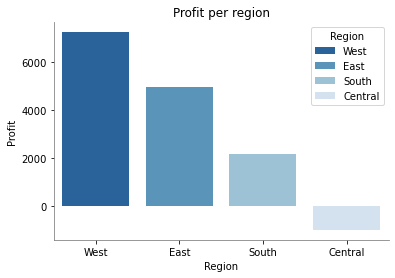

In [119]:
g = ss.groupby(['Region'])['Profit'].sum().reset_index().sort_values(by = ['Profit'], ascending=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = g, x = g['Region'], y = g['Profit'], hue = 'Region', dodge=False, palette='Blues_r')
plt.title('Profit per region')
plt.ylabel('Profit')
plt.show()

It was observed that the West region is the one that is presenting the greatest gain, but the only one that is showing a negative margin is the Central one. A little more of this region will be investigated.

Given that we have a discount column in our data, we proceed to analyze the two variables and compare them with the others to check if there is any impact.

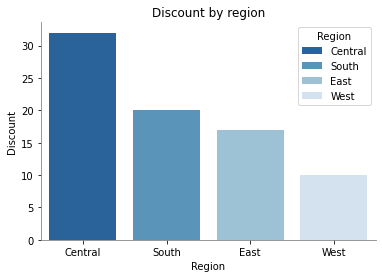

In [118]:
d = ss.groupby(['Region'])['Discount'].mean().reset_index().sort_values(by = ['Discount'], ascending=False)
d['Discount'] = round(d['Discount']*100, 0)
e = d.rename(columns= {'Discount': "Discount in %"})
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = e, x = e['Region'], y = e['Discount in %'], hue = 'Region', dodge=False, palette='Blues_r')
plt.title('Discount by region')
plt.ylabel('Discount')
plt.show()

It is observed that indeed the Central region is the one with the highest discount, for this reason it has negative profits. The following question arises. *Are these discounts increasing the number of orders? We proceed to review categories, discounts and quantity of orders.*

In [7]:
d = ss.groupby(['Region', 'Category'])['Discount'].mean().reset_index().sort_values(by = ['Discount'], ascending=False)
d['Discount'] = round(d['Discount']*100, 0)
o = ss.groupby(['Region', 'Category'])['Order ID'].count().reset_index()
o['Order ID'] = round(o['Order ID'], 0)
p = ss.groupby(['Region', 'Category'])['Profit'].sum().reset_index()
p['Profit'] = round(p['Profit'], 0)
un = pd.merge(d, o).rename( columns = {'Order ID':'Orders Quantity'})
un

,Region,Category,Discount,Orders Quantity
0,Central,Furniture,30.0,481
1,Central,Office Supplies,25.0,1422
2,South,Office Supplies,17.0,995
3,East,Furniture,15.0,601
4,East,Technology,14.0,535
5,East,Office Supplies,14.0,1712
6,West,Technology,13.0,599
7,Central,Technology,13.0,420
8,West,Furniture,13.0,707
9,South,Furniture,12.0,332


The Central and West region is observed, in the Furniture category, their amounts of orders are quite far apart, also taking into account a discount difference of 17 points. This part that was discovered allows us to talk with the category team and review the strategies that are being implemented because despite the fact that there is a significant discount, an increase in our sales is not being reflected.

Having reviewed the regions of the country, we want to detail, by state, which are those that are making profits and those that are presenting losses. A map is implanted and the radius of the red circle indicates how much it is compared to the other states.

In [117]:
sc = pd.read_csv('./spatial_c_usa.csv')
plotg = pd.merge(ss, sc, how='left', on='State') #Agregamos el codigo del estado para poder graficar el mapa.

In [116]:
import plotly.graph_objects as go

map = plotg.iloc[:, [10, 20, 21]].groupby(['code', 'State']).sum().reset_index() #Seleccionamos estado, codigo del estado y ganancia

fig = go.Figure(data=go.Choropleth(
    locations=map['code'], # Spatial coordinates
    z = map['Profit'].astype(float), # Data to be color-coded
    text = map['State'],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Profit",
))

fig.update_layout(
    title_text = 'Profit in USD per state',
    geo_scope='usa', # limite del mapa solo para USA
)

fig.show()

After having the vision of the part by regions and states, we proceed to continue with the analysis of the category and thus answer the second question of interest.

*Which is the category with the highest profit and sales?*

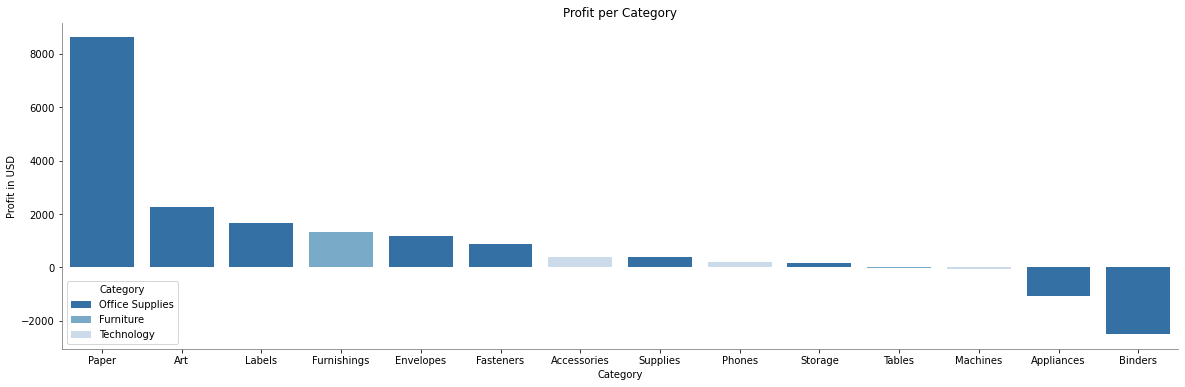

In [114]:
k = ss.groupby(['Category', 'Sub-Category'])['Profit'].sum()
l = k.reset_index(drop=False).sort_values(by = ['Profit'], ascending=False)
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = l, x = l['Sub-Category'], y = l['Profit'], hue = 'Category', dodge=False, palette='Blues_r')
plt.xlabel('Category')
plt.ylabel('Profit in USD')
plt.title('Profit per Category')
plt.show()

With the graph we were able to clarify which are the ones that generate the most profits, but in the field of sales is this pattern repeated? Let's review the same bar chart, but with sales in order to answer this question.

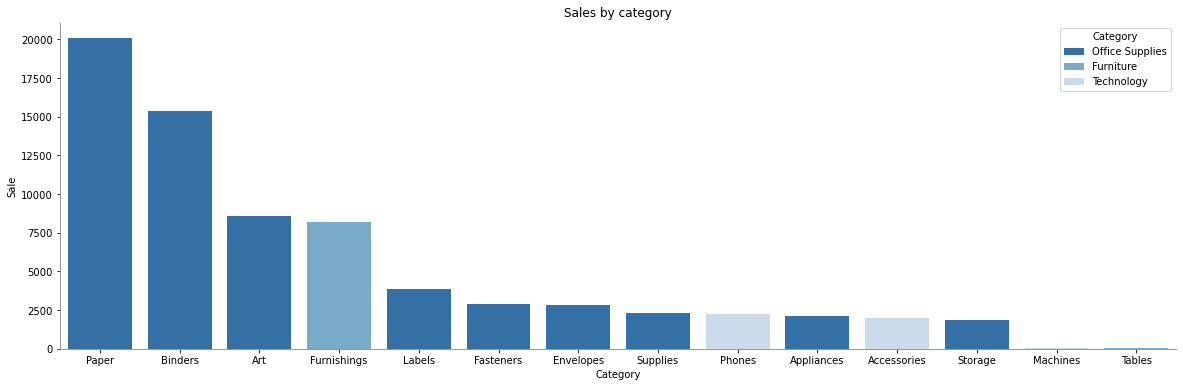

In [112]:
k = ss.groupby(['Category', 'Sub-Category'])['Sales'].sum()
l = k.reset_index(drop=False).sort_values(by = ['Sales'], ascending=False)
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = l, x = l['Sub-Category'], y = l['Sales'], hue = 'Category', dodge=False, palette='Blues_r')
plt.title('Sales by category')
plt.xlabel('Category')
plt.ylabel('Sale')
plt.show()

It was a bit to be expected, we observed that the subcategories are totally different from those of earnings. Is there a relationship between sales and profit? We are going to make a scatterplot to analyze.

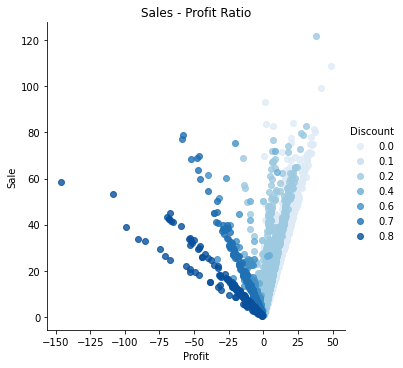

In [111]:
sns.lmplot(x='Profit', y='Sales', data=ss, fit_reg=False, hue='Discount', legend=True, palette='Blues')
plt.title('Sales - Profit Ratio')
plt.xlabel('Profit')
plt.ylabel('Sale')
plt.show()


We see that there is some data that the greater the sale, the greater the profit, but we wanted to investigate a little more by adding the discounts to the graph. Here we see another pattern also related that while the discount is higher, we see that the orders are going towards the negative vector. These categories are the ones we answered in the bar chart above.

Of these categories we also want to indicate to the client which are their star products, for which we will also make a bar graph to be able to identify them and to be able to answer question number 3 of interest. *What are our top-selling products?*

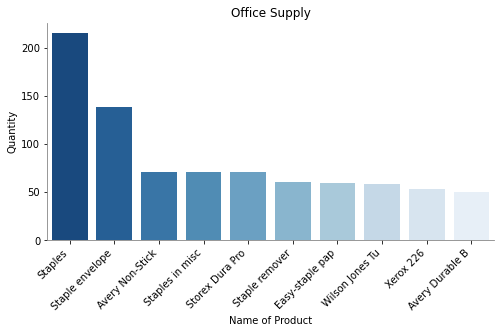

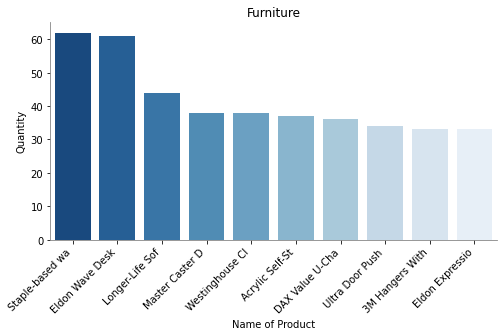

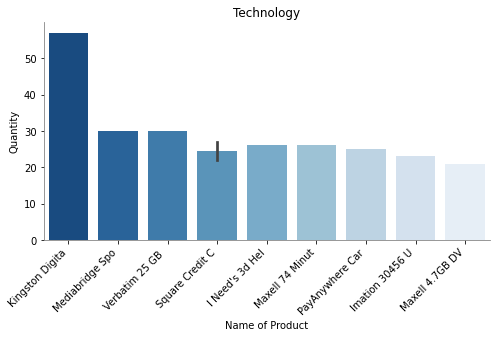

In [110]:
k = ss.loc[ss['Category'] == 'Office Supplies'].groupby(['Category', 'Product Name'])['Quantity'].sum()
l = k.reset_index(drop=False)
s = l.nlargest(n=10, columns=['Quantity'])
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
j = sns.barplot(data = s, x = s['Product Name'].str[:15], y = s['Quantity'], dodge=False, palette='Blues_r');
j.set(title='Office Supply')
plt.xlabel('Name of Product')
plt.ylabel('Quantity')
j.set_xticklabels(j.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');


k = ss.loc[ss['Category'] == 'Furniture'].groupby(['Category', 'Product Name'])['Quantity'].sum()
l = k.reset_index(drop=False)
s = l.nlargest(n=10, columns=['Quantity'])
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
j = sns.barplot(data = s, x = s['Product Name'].str[:15], y = s['Quantity'], dodge=False, palette='Blues_r');
j.set(title='Furniture')
plt.xlabel('Name of Product')
plt.ylabel('Quantity')
j.set_xticklabels(j.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

k = ss.loc[ss['Category'] == 'Technology'].groupby(['Category', 'Product Name'])['Quantity'].sum()
l = k.reset_index(drop=False)
s = l.nlargest(n=10, columns=['Quantity'])
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
j = sns.barplot(data = s, x = s['Product Name'].str[:15], y = s['Quantity'], dodge=False, palette='Blues_r');
j.set(title='Technology')
plt.xlabel('Name of Product')
plt.ylabel('Quantity')
j.set_xticklabels(j.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');                          

Once we get to the detail of sales. We can continue and clarify to the client which are their best months so that they have an idea and serve as an insight on how to manage their time well when carrying out a promotion or the Marketing team can take advantage of. We will show the history of sales by month over these 4 years of sales orders. Answering question 4 *What are the seasons with the highest demand?*.

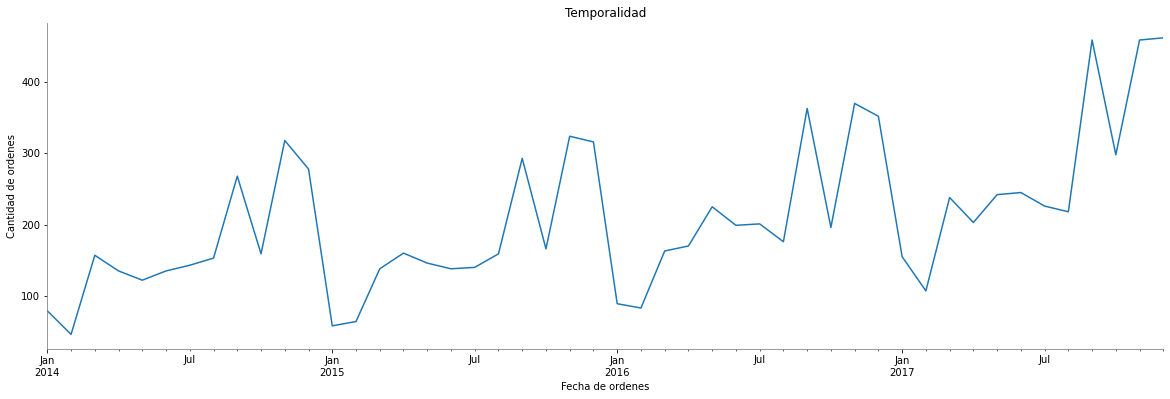

In [14]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'], format='%d-%m-%y')
m_s = ss.groupby(ss['Order Date'].dt.to_period('M')).size()
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.title('Temporality')
plt.ylabel('Quantity of orders'), plt.xlabel('Meses'), m_s.plot()
plt.xlabel('Order date')
plt.show()

Having the trends of each year, the client will be able to have a better notion of when to act with their Marketing campaigns and promotions, as well as the demand of their fleet to deliver the products.

At this point we know which regions, categories and products are benefiting the business, but what shipments are our customers using? What is your preference? For this we will make a barchart to clarify the percentage that each of the shipping options has.

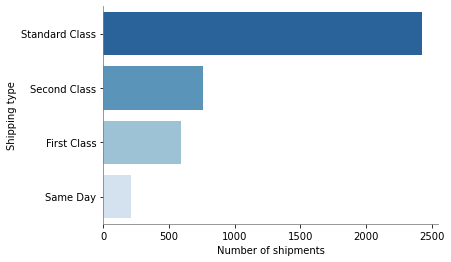

In [109]:
ship = ss.groupby(['Ship Mode'])['Order ID'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= ship['Order ID'], y = ship['Ship Mode'], orient='h', palette='Blues_r')
plt.ylabel('Shipping type')
plt.xlabel('Number of shipments')
plt.show()

Thanks to the bar graph, we know that most of the shipments, our customers select the 'Standard Class' option. This graph helps us answer question number 5 of interest *What is the shipment that our customers are using frequently?*, and we proceed with more questions, then this data exploratory will be generated.

Will there be a relationship between the numerical variables and the categorical one?

We create a new column to know the unit price of the products.

In [16]:
ss['Price'] = round(ss['Sales'] / ss['Quantity'],2)
ss = ss.loc[ss['Price']< 10.00]

Once the variable is added, we proceed to analyze and review if there is any correlation between the numerical variables and we can obtain some insight from it.

Correlation of numerical variables.

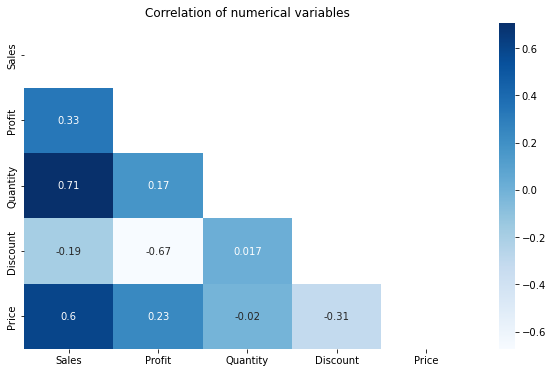

In [108]:
plt.figure(figsize=(10, 6))
plt.title('Correlation of numerical variables')
corr_val = ss[['Sales', 'Profit', 'Quantity', 'Discount', 'Price']].corr()
mask = np.triu(np.ones_like(ss[['Sales', 'Profit', 'Quantity', 'Discount', 'Price']].corr(),dtype = bool))
sns.heatmap(corr_val, 
            xticklabels = corr_val.columns.values,
            yticklabels = corr_val.columns.values,
            annot = True,
            cmap = 'Blues',
            mask = mask
            );

This correlation was made to know a little more about the values ​​and if we found something particular, but as expected we have relationships that the graph indicates are expected, for example:

Significant correlation between 'Quantity' and 'Sales', these depend on each one.
The negative correlation between 'Profit' and 'Discount' was also to be expected.

We'll continue to look at numerical variables with categories and review the insights we can get by combining certain variables.

Delivery time

The company wonders, having provided the different types of shipments for its products. The following questions arise:

1.- How can we optimize these types of shipments?
2.- How can we anticipate the types of shipments that will be received during a year?

In order to improve the forecast of the operations team regarding its fleet that provides the service, we wanted to analyze the relationships that exist between the different delivery times against the month of operations.

First we detail the types of shipments offered by the company and their times below:

In [107]:
ss['Delivery_time'] = pd.to_datetime(ss['Ship Date'], format='%d-%m-%y') - pd.to_datetime(ss['Order Date'], format='%d-%m-%y')
dt = ss.groupby(['Ship Mode'])['Delivery_time'].mean().reset_index()
dt


,Ship Mode,Delivery_time
0,First Class,2 days 04:22:42.162162162
1,Same Day,0 days 01:21:07.605633802
2,Second Class,3 days 06:06:38.944591029
3,Standard Class,5 days 00:29:40.708985985


Having defined times, we can take this variable and analyze it with the number of times a type of shipment is made during the 12 months.

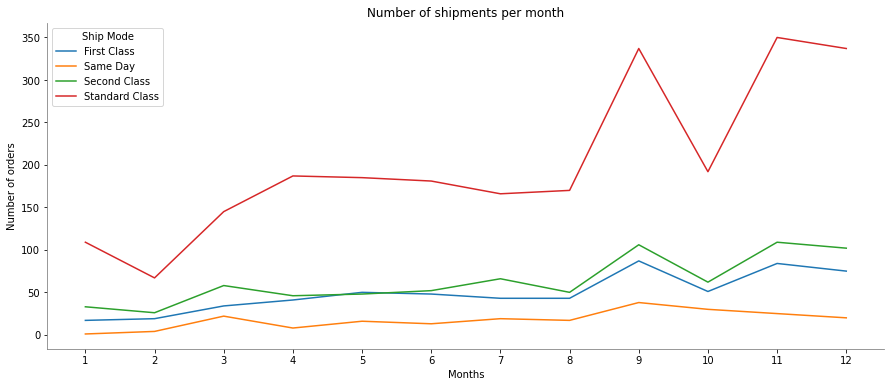

In [105]:
ss['Month'] = pd.to_datetime(ss['Order Date'], format='%d-%m-%y').dt.month
new_df = ss.groupby(['Month', 'Ship Mode'])['Order Date'].count().reset_index()
plt.figure(figsize=(15, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.lineplot(data = new_df, x = 'Month', y = 'Order Date', hue = 'Ship Mode')
x = new_df['Month']
plt.title('Number of shipments per month')
plt.ylabel('Number of orders')
plt.xlabel('Months')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

We see a similar pattern for order increases between months 9 and 12, except 'Standard Class' has a steady increase from month 3. However, month 3 is also an order increase for all types.

For the operations department, this insight is important in order to prevent some type of fleet shortage and be able to meet the demands during the year. We know that the scheduled shipping times for customers must be met because they are a great point in the company's reputation.

Taking advantage of the analysis that is being taken for the types of shipments, we want to add another variable, the price of the product for this occasion.

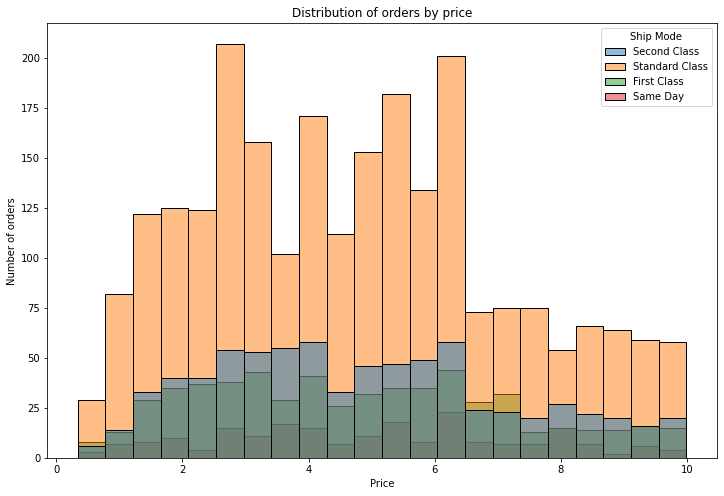

In [104]:
plt.figure(figsize=(12, 8))
sns.histplot(data=ss, x=ss['Price'], hue=ss['Ship Mode'])
plt.title('Distribution of orders by price')
plt.xlabel('Price')
plt.ylabel('Number of orders')
plt.show()

This distribution graph helps us to understand at which prices the largest number of orders are presented and what type of shipping the user will use. Thanks to this classification, we can see that a higher outlay on a product (more valuable product) is a relationship to needing it as soon as possible.

This insight helps us to understand customer behavior as well as for the sales team, together with the operations team, to reduce costs in the types of shipments, since the preferences are aimed at fleets that can ship in 5 days.

To complement and be able to respond to the optimization of shipments, we will evaluate which categories we can lower priority in the types of shipments.

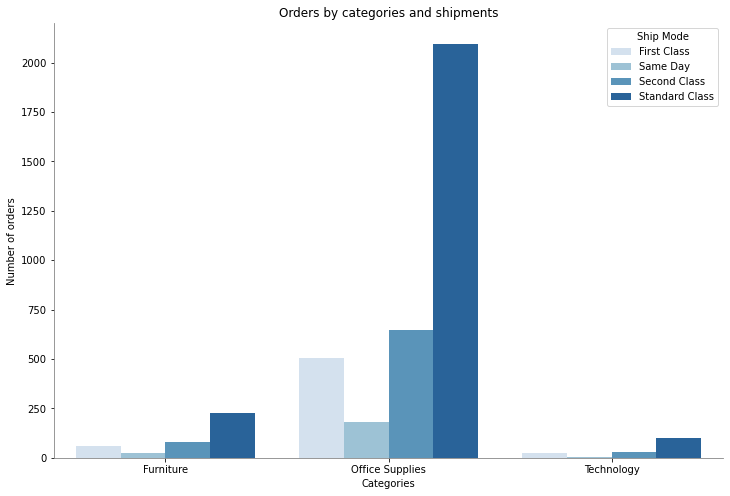

In [103]:
j = ss.groupby(['Category', 'Ship Mode'])['Order ID'].count().reset_index()
plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x=j['Category'], y=j['Order ID'], hue=j['Ship Mode'], data=j, ci=None, palette='Blues')
plt.title('Orders by categories and shipments')
plt.xlabel('Categories')
plt.ylabel('Number of orders')
plt.show()

The fleet used for same-day shipments only sees a greater quantity in 'Office Supplies', so we can take advantage of this type of shipment or even just leave this option for this category, since, compared to the others, it is quite a distance significant.

### Insight and recommendations

#### Regions of the dataset

At the head office it is recommended to review the levels of discounts that are being granted to customers. At some point the discount strategy is good to maintain or attract new customers, but always as it is showing us the profits, despite the fact that this does not affect the country level, it must still generate its own profits to be able to sustain the operations of the region.

#### Categories and Sub-Categories (Sales-Profit)

The appliance and Binders categories should be reviewed, these are the only ones that are negative compared to the rest. This discount could be lowered and applied to others that generate greater profit, cross-category and thus attract these two types of customers.

#### Seasonal sales

As we can observe the pattern in the 4 years of data that we have, it recommends that the company be prepared for the months from August and December, where it presents the greatest demand and they need to be with all optimal operations and comply with deliveries and delivery times. same.

#### Shipping Types

After having carried out all these analyzes with respect to the different types, the insights that were obtained were that they are not being used in the "Technology" category, for the purpose of optimization and cost reduction, it is recommended to the operations department prioritize and re-evaluate the fleet assigned to the categories. This should also be discussed with the price team, which is involved so that when the client selects a type of shipment, it has the appropriate cost and covers operational costs.

## Analysis of variables and modeling

#### Data Preparation

At this point we can continue with the preparation of the data to be able to enter it into the model.

In the X variables will be all the independent data (Segment, Ship Mode, Region, Category, Sales, Discount and Quantity), we will train this data to be able to predict our dependent variable Y which will be the profit (Profit)

In [22]:
#Create a copy of our data set
df2 = ss.copy()

Having copied the dataset and after having carried out the data exploration, we proceed with a new table, taking into account the relevant variables for this analysis.

In [23]:
df2 = df2[['Segment', 'Ship Mode', 'Region', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit']] #New dataset for model
df2.head()

,Segment,Ship Mode,Region,Category,Sales,Quantity,Discount,Profit
2,Corporate,Second Class,West,Office Supplies,14.620,2,0.0,6.8714
5,Consumer,Standard Class,West,Furniture,48.860,7,0.0,14.1694
6,Consumer,Standard Class,West,Office Supplies,7.280,4,0.0,1.9656
8,Consumer,Standard Class,West,Office Supplies,18.504,3,0.2,5.7825
12,Consumer,Standard Class,South,Office Supplies,15.552,3,0.2,5.4432


Having the variables to consider for the model, we proceed to the review again of missing values.

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 2 to 9992
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Segment    3989 non-null   object 
 1   Ship Mode  3989 non-null   object 
 2   Region     3989 non-null   object 
 3   Category   3989 non-null   object 
 4   Sales      3989 non-null   float64
 5   Quantity   3989 non-null   int64  
 6   Discount   3989 non-null   float64
 7   Profit     3989 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 280.5+ KB


Since we did not find missing or null values, we continue with the statistical description of the numerical variable.

In [25]:
df2.describe() # We check the means, std and quartiles

,Sales,Quantity,Discount,Profit
count,3989.000000,3989.000000,3989.000000,3989.00000
mean,18.127487,3.809727,0.193557,3.36415
std,14.476160,2.219668,0.253750,11.04020
min,0.444000,1.000000,0.000000,-146.16000
25%,7.890000,2.000000,0.000000,1.10160
50%,14.301000,3.000000,0.200000,3.91200
75%,23.976000,5.000000,0.200000,7.81760
max,121.680000,14.000000,0.800000,49.01400


It is observed that the values ​​in 'Sales', in the fourth quartile, have a very different frequency compared to the previous ones, however, they present a large percentage and these values ​​are maintained for the model.

It can also be considered that the values, the minimum value of profit is -146, which is well below the mean and the quartiles. We will make a boxplot to better visualize these outliers.

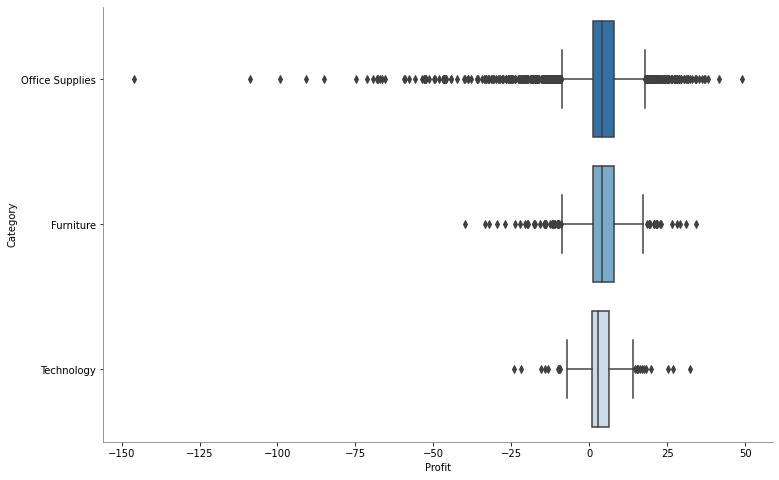

In [26]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.boxplot(y=df2['Category'], x=df2['Profit'], palette='Blues_r') # we review the outliers of each category
plt.grid(False)
plt.show()

In [27]:
df2.loc[df2['Profit'] < -50 ].groupby(['Region'])['Sales'].count() #Values ​​less than -50 in the profit column

Region
Central    23
East        1
South       1
West        1
Name: Sales, dtype: int64

#### Variable modification

It was observed that the outliers represent 0.6% of the total, so we proceed to eliminate these rows so that our model cannot be so biased by these values ​​so far from the rest.

In [28]:
df2 = df2.loc[df2['Profit'] > -50] #quitamos los outliers

In [29]:
df2.describe() #Revisamos nuevamente las estadisticas numericas

,Sales,Quantity,Discount,Profit
count,3963.000000,3963.000000,3963.000000,3963.000000
mean,17.983238,3.791572,0.189654,3.841086
std,14.358262,2.207316,0.249935,9.207849
min,0.444000,1.000000,0.000000,-49.920000
25%,7.872000,2.000000,0.000000,1.166800
50%,14.130000,3.000000,0.200000,3.949800
75%,23.865000,5.000000,0.200000,7.881600
max,121.680000,14.000000,0.800000,49.014000


We continue with the separation of the independent variables from the dependent one (Profit)

In [30]:
#Data preparation
X= df2[['Segment', 'Ship Mode', 'Region', 'Category', 'Sales', 'Discount', 'Quantity']]
y= df2[['Profit']]

### Coding of categorical variables

In [31]:
A = df2[['Sales', 'Discount', 'Quantity']] #Numeric variables
B=pd.get_dummies(X[['Segment', 'Ship Mode', 'Region', 'Category']]) #Coding of the categories
X_new=pd.concat([A,B],axis=1) #Join the columns again, having the categorical ones already coded
X_new

,Sales,Discount,Quantity,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
2,14.620,0.0,2,0,1,0,0,0,1,0,0,0,0,1,0,1,0
5,48.860,0.0,7,1,0,0,0,0,0,1,0,0,0,1,1,0,0
6,7.280,0.0,4,1,0,0,0,0,0,1,0,0,0,1,0,1,0
8,18.504,0.2,3,1,0,0,0,0,0,1,0,0,0,1,0,1,0
12,15.552,0.2,3,1,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,16.520,0.2,5,1,0,0,1,0,0,0,0,1,0,0,0,1,0
9982,35.560,0.0,7,1,0,0,0,0,0,1,1,0,0,0,0,1,0
9984,31.500,0.0,10,1,0,0,0,0,0,1,0,1,0,0,0,1,0
9989,25.248,0.2,3,1,0,0,0,0,1,0,0,0,1,0,1,0,0


### Training

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42) #Separation of training and test data

To predict our Y variable, we will use the multivariate linear regression algorithm.

In [35]:
regressor = LinearRegression() #We create the function of the algorithm

In [36]:
regressor.fit(X_train,y_train) #We fit our data

LinearRegression()

In [37]:
print(regressor.intercept_) #We check the intercept when all our variables have no value.

[2.40020261]


In [38]:
print(regressor.coef_) #We review coefficient

[[  0.21151308 -23.32912495   0.16131996   0.13939254   0.11035461
   -0.24974715  -0.06550143   0.06772835   0.10047707  -0.10270399
   -0.12712995   0.22598728  -0.0449534   -0.05390394   0.06459905
    1.73612207  -1.80072112]]


Each result is in the same order as the dataset being trained. We can see that the number -23.32 stands out, following the order of the data frame, we deduce that it is the discount variable that has the greatest impact on our dependent variable (Profit).

In [39]:
y_pred = regressor.predict(X_test) #We predict the values
y_pred.shape

(793, 1)

In [40]:
r2lr = r2_score(y_test, y_pred) #We calculate the r2
r2lr

0.5999975698909972

r2_score nos explica la diferencias que se encuentran nuestros valores subre la línea regresora. 0.59 no es el número esperado para decir que es un modelo que se adapte very well to our data. Without embargo, we're going to use the metrics function to know the values ​​that give us the best context for the resolver problem.

In [41]:
rmselr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE
print('Meadian Absolute Error:', metrics.median_absolute_error(y_test,y_pred)) #MAE

Mean Absolute Error: 3.620517090097067
Root Mean Squared Error: 5.604729737006335
Meadian Absolute Error: 2.5645991851065


Since we are working with a numerical regression, that in this case we will need to predict the profit, we apply this type of metrics to evaluate your example.

With values ​​of the metrics we can observe that the differences we observe between the test values ​​(y_test) vs the values ​​to predict (y_pred) are not as high, so it can be concluded that the mismas are found in a good range. This gives us a signal of good training in the model and your prediction will be able to be sought, these values ​​will be able to improve when we train the models with greater cantidad of data.

In [396]:
X_trainp, X_testp = sc.fit_transform(X_train), sc.transform(X_test)
X_trainp, X_testp = pca.fit_transform(X_trainp), pca.transform(X_testp)
X_red_train, X_red_test = pca.fit_transform(X_trainp), pca.transform(X_testp)[:,0:11]
pcr = regressor.fit(X_red_train[:,0:11], y_train)
y_preds = pcr.predict(X_red_test)
r2_score(y_test, y_preds) #Calculamos el r2

0.3693524018056179

Nuestro r2 se reduce considerablemente seleccionando hasta nuestro PCA11. Continuamos utilizando todas las variables.

Debido que no pudimos realizar la reducción de dimensionalidad, queremos aplicar una regularización que pueda penalizar cada una de las variables que no esten siendo relevantes para el modelo. Las dos regularizaciones que usaremos serán Ridge y Elastic net, obtener el RMSE de cada una y comparar si mejoran las metricas o emporan de acuerdo a las variaciones que haremos con las variables.

### Ridge

In [100]:
# Creation and training of the model (searched for CV of the best alpha value)
# By default, RidgeCV uses the mean squared error.
modelo = RidgeCV(
            alphas          = np.logspace(0, 10, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

When regularización is used, it is useful to evaluate how they approximate the coeficientes of the medium that increases the alpha value.

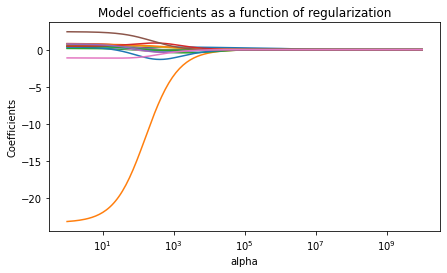

In [101]:
# Evolution of the coefficients in the alpha function
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.set_title('Model coefficients as a function of regularization');
plt.axis('tight')
plt.show()

If it could be like this, the average that increases the value of alpha, the regularization is greater and the value of the coefficients is reduced.

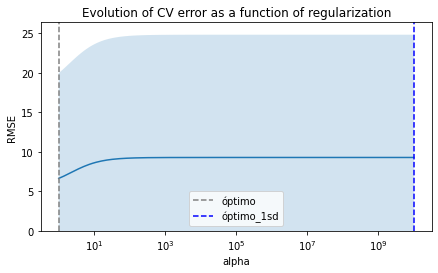

In [102]:
# Error evolution in alpha function

# model.cv_values ​​stores the mse of cv for each value of alpha. Holds #dimensions (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Identify the optimum and the optimal + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolution of CV error as a function of regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [98]:
# Best alpha value found
print(f"Best value of alpha found: {modelo.alpha_}")

Best value of alpha found: 0.000535356667741073


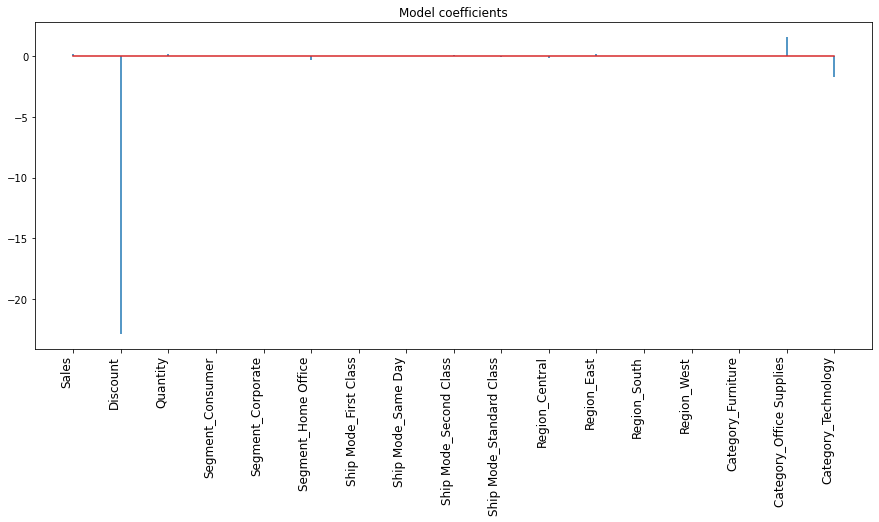

In [97]:
# Model coefficients
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(15, 6))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_title('Model coefficients');

Here we see that the variables are still considered for the most part. You can also notice how the range of the coefficients was reduced compared to LinearRegression

In [50]:
# test predictions
predicciones = modelo.predict(X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([11.37672113,  4.85658712,  4.47964973,  5.82588448,  1.88767441,
        7.41846787, -6.23998239,  5.39563861,  6.16729339,  4.80153188])

In [52]:
# Model test error
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"The error (rmse) of test is: {rmse_ridge}")
r2rid = r2_score(y_test, predicciones)
print('R2:', r2rid)


The error (rmse) of test is: 6.334685418043114
R2: 0.48902060955612725


Compared to LinearRegression, there was an increase in rmse. We proceed with the following regularization.

### Elastic net

In [53]:
# Creation and training of the model (with search by CV of the optimal alpha value)
# By default ElasticNetCV uses the mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [54]:
# Evolution of the error as a function of alpha and l1_ratio
# model.mse_path_ stores the mse of cv for each value of alpha and l1_ratio.
# Has dimensions (n_l1_ratio, n_alpha, n_folds)

# Average error of the 10 partitions for each value of alpha and l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# The result is an array of dimensions (n_l1_ratio, n_alpha)
# Convert to a dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1296,0.99,0.000535,33.797745,5.813583
1297,0.99,0.000461,33.797889,5.813595
1295,0.99,0.000622,33.798859,5.813679
1298,0.99,0.000396,33.799013,5.813692
1299,0.99,0.000341,33.801214,5.813881
...,...,...,...,...
241,0.10,2.097046,86.356733,9.292832
242,0.10,1.804186,86.356733,9.292832
243,0.10,1.552225,86.356733,9.292832
235,0.10,5.170920,86.356733,9.292832


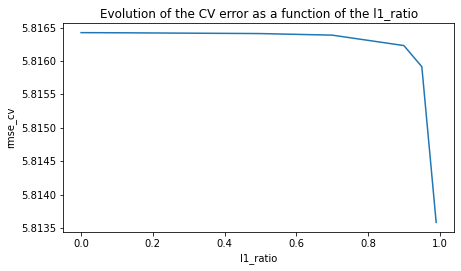

In [96]:
# Best value found for each l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolution of the CV error as a function of the l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');


In [56]:
# Best alpha and l1_ratio_ value found
print(f"Best value of alpha found: {modelo.alpha_}")
print(f"Best value of l1_ratio found: {modelo.l1_ratio_}")


Best value of alpha found: 0.000535356667741073
Best value of l1_ratio found: 0.99


In [57]:
# Model coefficients
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

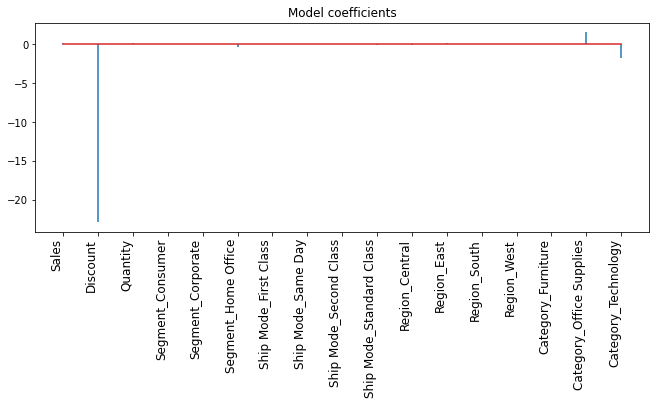

In [59]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_title('Model coefficients');

As we can see, this regularization penalized the predictors that are not more relevant, reducing the number of variables to 10. Regarding the range of the coefficients, it can be seen that it is similar to the Linear Regression model.

In [60]:
# test predictions
predicciones = modelo.predict(X_test)
predicciones = predicciones.flatten()

In [61]:
# Model test error
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"The error (rmse) of the test is: {rmse_elastic}")
r2el = r2_score(y_test, predicciones)
print('R2:', r2el)


The error (rmse) of the test is: 5.600976364834392
R2: 0.6005331372942548


The rmse obtained was quite close to the LinearRegression, so we can conclude that by applying the regularization we did not obtain such an optimal improvement of the model. In order to find the best model that best fits the data and best performs its predictions, modeling with RandomForestRegressor is continued.

### Random Forest Regressor

Before starting with the training of the model, let's apply Cross Validation (k-fold) to be able to evaluate all the splits of the training and obtain the average r2 of all the iterations (folds), with this metric it will help us to demonstrate or validate that the model can applied and better predict the results.

In [62]:
#Create the model
model = RandomForestRegressor()
scores = cross_val_score(model, X_new, y, cv=7, verbose=1,scoring='r2') #Le indicamos al Cross_val el modelo, los datos, las veces que iterará (7 veces) y la metrica r2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.2s finished


In [63]:
#Show the result of r2 for all 7 iterations.
scores

array([0.9288662 , 0.89863365, 0.89162464, 0.8765061 , 0.88522143,
       0.87532824, 0.90959523])

We can see that all the scores are in the same range of values. This gives us a good approximation of what we are looking for. We proceed to calculate average r2 and the standard deviation between the values ​​of r2.

In [64]:
print("%0.2f of average r2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 of average r2 with a standard deviation of 0.02


In [65]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
pre = model.predict(X_test)

In [67]:
rmserfr = np.sqrt(metrics.mean_squared_error(y_test, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pre)))
r2rfr = r2_score(y_true= y_test, y_pred= pre)
print('R2: ',r2rfr)

RMSE: 2.9665801946806556
R2:  0.8879361691113141


As we can see, the average r2 of all the splits that Cross_Val was able to do in the analysis increased considerably by 30%. We can conclude that this model, when training and doing the split, will have a good accuracy score on average.

### GradientBoost

We will train another model to compare model outputs.

In [68]:
gbr = GradientBoostingRegressor() #Instantiate the model

We will again apply cross validation to review our scores.

In [69]:
scoresgb = cross_val_score(gbr, X_new, y, cv=7, verbose=1,scoring='r2') #We indicate to the Cross_val the model, the data, the times it will iterate (7 times) and the r2 metric

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished


In [70]:
scoresgb

array([0.93822784, 0.91081999, 0.9285287 , 0.87921709, 0.88458058,
       0.86536099, 0.91943369])

In [71]:
gbr.fit(X_train,y_train) #We adjust the data

GradientBoostingRegressor()

In [72]:
print("%0.2f of average r2 with a standard deviation of %0.2f" % (scoresgb.mean(), scoresgb.std()))

0.90 of average r2 with a standard deviation of 0.03


In [73]:
predi = gbr.predict(X_test)

In [74]:
rmsegbr = np.sqrt(metrics.mean_squared_error(y_test, predi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predi)))
r2gb = r2_score(y_true= y_test, y_pred= predi)
print('R2: ', r2gb)

RMSE: 2.8194815657108294
R2:  0.8987740648467932


In this instance, we can conclude that Random Forest and Greadient Boosting have the best metrics.

To optimize the results, we decided to apply GriadSearchCV on the best models, such as RFR and Gradient Boosting, and find the best parameters to model.

#### Hyperparameters for Gradient Boosting

In [75]:
param_grid = {'max_depth' : [3, 7, 9],
              'n_estimators' : [10, 50, 100, 500],
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
              'subsample' : [0.5, 0.7, 1]}

grid_gb = GridSearchCV(estimator = gbr,
                                  param_grid = param_grid,
                                  cv = 10, 
                                  n_jobs = -1) # corrida en paralelo

In [456]:
grid_gb.fit(X_train, y_train)

/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversio

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [10, 50, 100, 500],
                         'subsample': [0.5, 0.7, 1]})

In [457]:
grid_gb.best_params_ #Best hyperarameters

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

In [76]:
gbr_new = GradientBoostingRegressor(n_estimators=100, 
    learning_rate=0.1,
    max_depth= 3, 
    subsample=1)

In [77]:
gbr_new.fit(X_train,y_train)

GradientBoostingRegressor(subsample=1)

In [78]:
ypredi = gbr_new.predict(X_test)

In [79]:
rmsegbgs = np.sqrt(mean_squared_error(y_test, ypredi))
print('RMSE: ', rmsegbgs)
r2gbgs = r2_score(y_true= y_test, y_pred= ypredi)
print('R2:', r2gbgs)

RMSE:  2.819818301409723
R2: 0.8987498842159045


#### Hyperparameters for Random Forest

In [80]:
#We define the search parameters
params = {
    'n_estimators' : [30, 50, 100, 200],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[5, 6, 7]
}

grid_random_forest = GridSearchCV(estimator = model,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error', 
                                  cv = 7, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [445]:
%time
#We train the model
grid_random_forest.fit(X_train, y_train)

CPU times: user 3 µs, sys: 7 µs, total: 10 µs
Wall time: 33.1 µs
Fitting 7 folds for each of 432 candidates, totalling 3024 fits


/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jesuslopez/opt/anaconda3/envs/coderhouse/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jesuslopez/opt/anaconda3

GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [5, 6, 7], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [446]:
#We get the best hyperparameters for the model.
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=7, max_features=7,
                      n_estimators=200)

In [447]:
grid_random_forest.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 1,
 'n_estimators': 200}

Having the optimal hyperparameters thanks to GridSearch, we instantiate our model again with these parameters.

In [81]:
random_forest_nuevo = RandomForestRegressor(criterion='absolute_error', max_depth=7, max_features= 7, n_estimators=200, min_samples_leaf=1) #We instantiate the model with the new hyperparameters

In [82]:
random_forest_nuevo.fit(X_train,y_train) #We adjust the data

RandomForestRegressor(criterion='absolute_error', max_depth=7, max_features=7,
                      n_estimators=200)

We predict our values ​​with the test ones.

In [83]:
pred = random_forest_nuevo.predict(X_test)

We obtain the necessary metrics to be able to compare with previous models.

In [84]:
rmserfgs = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2rfgs = r2_score(y_true= y_test, y_pred= pred)
print('R2: ', r2gbgs)

RMSE: 3.1133346597888307
R2:  0.8987498842159045


Once the metrics of all the models have been obtained. Let's see the importance of each variable in our models.

In [85]:
importances = random_forest_nuevo.feature_importances_ # We apply the function to extract the percentages
headers = ["name", "score"]
values = sorted(zip(X_train.columns, random_forest_nuevo.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

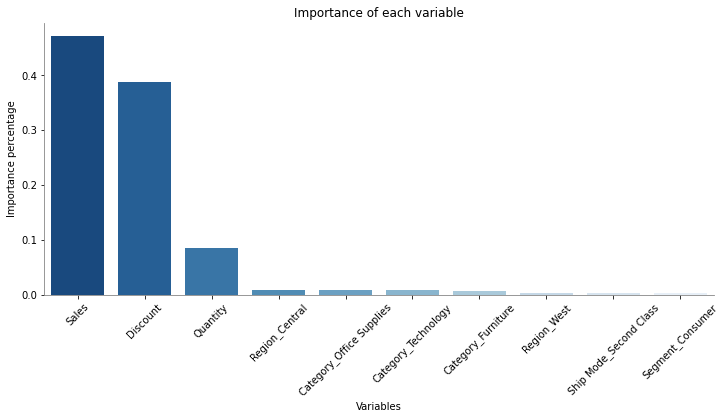

In [90]:
final_importance= xgb_feature_importances.head(10) #We select the first 10
plt.figure(figsize=(12,5))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
ax=sns.barplot(x=final_importance.name, y= final_importance.score, palette='Blues_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title('Importance of each variable')
plt.xlabel('Variables')
plt.ylabel('Importance percentage')
plt.grid(False)
plt.show()

We can see that the variables that are most relevant when it comes to predicting profits (Profit) are Sales, Discount and Quantity. The remaining ones can be seen to be very insignificant and even tend to be closer to 0.

Once all the RMSE and R2 are obtained, we can create a table with each one and have a better comparison of the models.

We start the models without optimizing their parameters:

In [91]:
df_comparacion = pd.DataFrame({
                    'model': ['RandomF', 'LinearR', 'Ridge', 'Elastic-net', 'Gradient boosting'],
                    'test rmse': [rmserfr, rmselr, rmse_ridge, rmse_elastic, rmsegbr],
                    'r2':[r2rfr, r2lr, r2rid, r2el, r2gb]
                 }).sort_values(by='test rmse', ascending=True)
df_comparacion

,model,test rmse,r2
4,Gradient boosting,2.819482,0.898774
0,RandomF,2.966580,0.887936
3,Elastic-net,5.600976,0.600533
1,LinearR,5.604730,0.599998
2,Ridge,6.334685,0.489021


You may notice that Gradient Boosting and Random Forest are the best on both metrics. Having this information to obtain better results, a GridSearchCV is performed on both to improve the parameters.

Below are the results of each after hyperparameter optimization.

In [94]:
df_comparacion_grid = pd.DataFrame({
                    'Model': ['RandomF + GridSearchCV', 'Gradient boosting + GridSearchCV'],
                    'test rmse': [rmserfgs, rmsegbgs],
                    'r2':[r2rfgs, r2gbgs]
                 }).sort_values(by='test rmse', ascending=True)

In [95]:
df_comparacion_grid

,Model,test rmse,r2
1,Gradient boosting + GridSearchCV,2.819818,0.898750
0,RandomF + GridSearchCV,3.113335,0.876575


After comparing the models after their optimization, we see that there was not much improvement. Only in the case of Gradient Boosting, which reduced the rmse by a few percent. Random Forest did not improve. Therefore, the best model that was adapted to the data and has a better prediction of the gains with the variables analyzed is Gradient Boosting.

## Conclusions

To answer the company's question, which are the variables that are relevant to predict profits are sales, discounts and quantities. Therefore, it is proposed to the company that having these values, we can make a forecast for the sales that they plan to have in the future, as well as when making a discount, this will also be considered since this is one of the important fields to be able to predict.